In [29]:
#import basic libraries

import csv
import sys
import os
import math
import numpy as np
import numpy.linalg as npla
import scipy
from scipy import sparse
from scipy import linalg
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import axes3d
#%matplotlib tk
import operator
sys.path.append("../Python_code") # go to parent dir
from reddit import *
from analytics_combined import *
import pandas as pd

In [30]:
import sys
sys.path.append("../Python_code") # go to parent dir
from reddit import *
from canvas_vis import *
from project_data_analysis import *
from generate_proj_to_remove import *

In [31]:
#Run this before anything else!

input_file_proj_17 = "../data/tile_placements_no_duplicates.csv"
input_file_proj_22 = "/home/yw180/place/data_2022/tile_placements_before_whiteout.csv"
input_file_proj_23 = "/home/yw180/place/data_2023/tile_placements_before_whiteout.csv"
#input_file_proj_den_freq = "../data/sorted_tile_placements_proj_den_freq.csv"
#input_file_proj_den_users = "../data/sorted_tile_placements_proj_den_users.csv"


# js_filename = "../data/atlas.json"
js_filename_17 = "../data/atlas.json"
js_filename_22 = "/home/yw180/place/data_2022/atlas/atlas.json"
js_filename_23 = "/home/yw180/place/data_2023/atlas/atlas.json"

locations_17 = store_locations(js_filename_17)
locations_22 = store_locations_22(js_filename_22)
locations_23 = store_locations_22(js_filename_23)

names_17, descriptions_17 = read_picture_names_and_descriptions_17(js_filename_17)
names_22, descriptions_22 = read_picture_names_and_descriptions(js_filename_22)
names_23, descriptions_23 = read_picture_names_and_descriptions(js_filename_23)

# 2017

In [32]:
# Compute the updates per user 2017
updates_user_17, total_updates_17 = updates_per_user(input_file_proj_17)
print("total updates:", total_updates_17)

# AVG
print("AVG = ", np.mean(np.array(list(updates_user_17.values()))))
#STD
print("STD = ", np.std(np.array(list(updates_user_17.values()))))

total_hour_17 = 89
# updates_user_17_per_hour = {k: updates_user_17[k] / total_hour_17 for k in updates_user_17}

total updates: 16559407
AVG =  14.190647377207085
STD =  29.929818449494757


In [7]:
def icdf_per_hour(dct):
    count = np.zeros(int(max(dct.values()) + 1))
    for k in dct:
        pos = int(dct[k])
        count[pos] = count[pos] + 1
    for i in reversed(range(len(count)-1)):
        count[i] = count[i] + count[i+1]
    count = count / count[0]
    return count

In [19]:
count_1[1]

0.031035440182908228

In [15]:
updates_user_17

{'2puPLvQ6X2zTSpfBkHXhxlIVo40=': 156,
 'GP2B74SRyrZ3HIflSFoAzM+jS3U=': 35,
 '/Xps73KHIk/Nq/0bTtoLOSl6a0g=': 158,
 'wKBTwQkJ5rpb4lDOh0/g7kfwE38=': 119,
 'M8OqnTY0LCWPv/3cdYQTeDwoOmM=': 160,
 '0sEajkyzj08p6pxmAdURcXCroTE=': 95,
 'x4aVz+tGFXbipJHX0GgSNFTskJo=': 86,
 'sJFyV/E18KXs80NYbxPD35yZ2dE=': 23,
 '4PJkDshpIjKKwV7WEuAE1eqzBCs=': 101,
 'udBtFbNNKz8KvcRpDT1UnL5OCyM=': 26,
 'PQ87ndys7DDEAIxeAw5sE6R4y08=': 110,
 '9xSww939tWY/1v1KZx9IeOoLI68=': 44,
 'pikhQrg9YEkVayTyR2hUsu66jRk=': 121,
 'M5wex3aX2jmJtPw/uYmmEIWlDN0=': 41,
 '3aSvsEuR3DHtHmZAaTH7oMpXNwo=': 357,
 'KriKEMnqX5j7k91VDEiMNBHDWOE=': 147,
 'mqbvCEGQ2T9GI6pyCbX22Xmjbsc=': 196,
 'b2Pf1LzOP99PB3dloJgzarqnw7g=': 71,
 '6RjVpvVwVvTZ7GJNtCCg7kAwtkM=': 5,
 '3d4BDHGeF0VxWOoaBNEFCyP6Kdg=': 21,
 'zpoKKue+iDef8sniGueRdqyxQ2Y=': 168,
 'YJUOgEGp0QGRhHhpl3n4gIRaoSU=': 3,
 'OxXA2zXgUqmlZ25GZjpUsDY9s2o=': 33,
 'vNPmJEHgN8pRAmQ0UVsBu7ARukk=': 99,
 'HMta7SK2VDPp0n5DIvdDKwDIick=': 2,
 'QF1caoCIP+79WTwm1v3/Sn9Eydc=': 27,
 '0WHQ2bSyMO2cUnNQysXbrYd9tYo=

TypeError: object of type 'NoneType' has no len()

<Figure size 640x480 with 0 Axes>

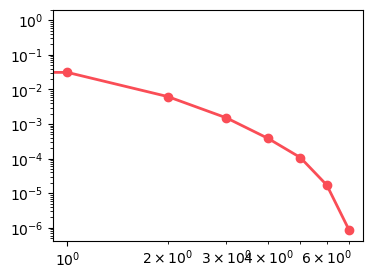

In [36]:
#Inverse cumulative density funcition

def plot_updates_per_user_icdf(count1, count2, count3, output_file_name):
    plt.clf()
    plt.figure(figsize=(4,3))
    ax = plt.subplot(111)
    ax.loglog(range(len(count1)), count1, color="#fa4d56", marker = 'o', markevery=0.01, linewidth=2, label = "2017")
    ax.loglog(range(len(count2)), count2, color="#002d9c", marker = 's', markevery = 0.1, linewidth=2, linestyle = 'dashed', label = "2022")
    ax.loglog(range(len(count3)), count3, color="b-", linewidth=2, label = "2023")
#     ax.loglog(range(len(count1)), count1, color="#fa4d56", linewidth=2, linestyle='dashdot', label = "2017")
#     ax.loglog(range(len(count2)), count2, color="#002d9c", linewidth=2, linestyle = 'dashed', label = "2022")
#     ax.loglog(range(len(count3)), count3, color="#005d5d", linewidth=2, linestyle='dotted', label = "2023")

    ax.set_ylabel('ICDF', fontsize=15)
    ax.set_xlabel('# updates/hour', fontsize=15)
    ax.tick_params(labelsize=10)
#     ax.set_xlim(1,100)
#     ax.set_ylim(None,0.1)
    ax.legend(loc = 'upper right')
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    
#Computing ICDF
count_1 = icdf_per_hour(updates_user_17_per_hour)
# count_2 = icdf_per_hour(updates_user_22_per_hour)
# count_3 = icdf_per_hour(updates_user_23_per_hour)

plot_updates_per_user_icdf(count_1, None, None, "../plots/updates_user_3_years.svg")

In [ ]:
count_1 = icdf_per_hour(updates_user_17)
plot_updates_per_user_icdf(count_1, None, None, "../plots/updates_user_3_years.svg")

In [28]:
count_1[2]

0.6724353942501825

In [37]:
# Compute the updates per user 2022
updates_user_22, total_updates_22 = updates_per_user(input_file_proj_22)
print("total updates:", total_updates_22)
# AVG
print("AVG = ", np.mean(np.array(list(updates_user_22.values()))))
#STD
print("STD = ", np.std(np.array(list(updates_user_22.values()))))

total_hour_22 = 81
updates_user_22_per_hour = {k: updates_user_22[k] / total_hour_22 for k in updates_user_22}

total updates: 149560839
AVG =  14.885071688495694
STD =  27.80962683518648


In [38]:
# Compute the updates per user 2023
updates_user_23, total_updates_23 = updates_per_user(input_file_proj_23)
print("total updates:", total_updates_23)
# AVG
print("AVG = ", np.mean(np.array(list(updates_user_23.values()))))
#STD
print("STD = ", np.std(np.array(list(updates_user_23.values()))))

total_hour_23 = 125
updates_user_23_per_hour = {k: updates_user_23[k] / total_hour_23 for k in updates_user_23}

total updates: 122719796
AVG =  14.645392941009113
STD =  35.922685670809166


<Figure size 640x480 with 0 Axes>

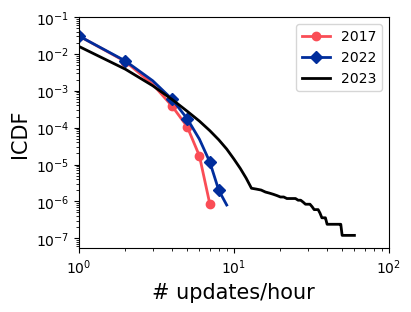

In [40]:
#Inverse cumulative density funcition

def plot_updates_per_user_icdf(count1, count2, count3, output_file_name):
    plt.clf()
    plt.figure(figsize=(4,3))
    ax = plt.subplot(111)
    ax.loglog(range(len(count1)), count1, color="#fa4d56", marker = 'o', markevery=0.1, linewidth=2, label = "2017")
    ax.loglog(range(len(count2)), count2, color="#002d9c", marker = 'D', markevery = 0.1, linewidth=2, label = "2022")
    ax.loglog(range(len(count3)), count3, color="k", linewidth=2, label = "2023")
#     ax.loglog(range(len(count1)), count1, color="#fa4d56", linewidth=2, linestyle='dashdot', label = "2017")
#     ax.loglog(range(len(count2)), count2, color="#002d9c", linewidth=2, linestyle = 'dashed', label = "2022")
#     ax.loglog(range(len(count3)), count3, color="#005d5d", linewidth=2, linestyle='dotted', label = "2023")

    ax.set_ylabel('ICDF', fontsize=15)
    ax.set_xlabel('# updates/hour', fontsize=15)
    ax.tick_params(labelsize=10)
    ax.set_xlim(1,100)
    ax.set_ylim(None,0.1)
    ax.legend(loc = 'upper right')
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    
#Computing ICDF
count_1 = icdf_per_hour(updates_user_17_per_hour)
count_2 = icdf_per_hour(updates_user_22_per_hour)
count_3 = icdf_per_hour(updates_user_23_per_hour)

plot_updates_per_user_icdf(count_1, count_2, count_3, "../plots/updates_user_3_years.svg")

In [61]:
#Inverse cumulative density funcition

def plot_updates_per_user_icdf(count1, count2, count3, output_file_name):
    plt.clf()
    plt.figure(figsize=(4,3))
    ax = plt.subplot(111)
    ax.loglog(range(len(count1)), count1, color="#fa4d56", marker = 'o', markevery=0.01,linewidth=2, label = "2017")
    ax.loglog(range(len(count2)), count2, color="#002d9c", marker = 'x', markevery = 0.01, linewidth=2, label = "2022")
    ax.loglog(range(len(count3)), count3, color="k", linewidth=2, label = "2023")
#     ax.loglog(range(len(count1)), count1, color="#fa4d56", linewidth=2, linestyle='dashdot', label = "2017")
#     ax.loglog(range(len(count2)), count2, color="#002d9c", linewidth=2, linestyle = 'dashed', label = "2022")
#     ax.loglog(range(len(count3)), count3, color="#005d5d", linewidth=2, linestyle='dotted', label = "2023")

    ax.set_ylabel('icdf', fontsize=15)
    ax.set_xlabel('# updates/hour', fontsize=15)
    ax.tick_params(labelsize=10)
    ax.set_xlim(1,100)
    ax.set_ylim(None,0.1)
    ax.legend(loc = 'upper right')
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

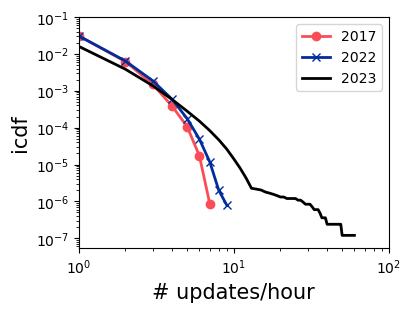

In [62]:
plot_updates_per_user_icdf(count_1, count_2, count_3, "../plots/updates_user_3_years.svg")